In [0]:
from google.colab import (files,drive)
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime as dt

drive.mount('/content/gdrive', force_remount=True)
path = "/content/gdrive/"
os.chdir(path)

Mounted at /content/gdrive


In [0]:
import numpy as np
import pandas as pd
from datetime import datetime, date, time
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss
from sklearn.feature_extraction import FeatureHasher
from sklearn import preprocessing 
from sklearn.pipeline import Pipeline
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier #note: activate the xgboost environment
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE  
# !pip3 install imbalanced-learn
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_recall_curve, accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, auc, classification_report,roc_curve


##EDA


In [0]:
data_0 = pd.read_csv('My Drive/BAX423+453 Five Guys/BAX423 BIG DATA/Final Project/Data/merge_data/merge_data_10k_0.csv')
data_1 = pd.read_csv("My Drive/BAX423+453 Five Guys/BAX423 BIG DATA/Final Project/Data/merge_data/merge_data_10k_1.csv")
data_2 = pd.read_csv("My Drive/BAX423+453 Five Guys/BAX423 BIG DATA/Final Project/Data/merge_data/merge_data_10k_2.csv")
data_3 = pd.read_csv("My Drive/BAX423+453 Five Guys/BAX423 BIG DATA/Final Project/Data/merge_data/merge_data_10k_3.csv")
data_4 = pd.read_csv("My Drive/BAX423+453 Five Guys/BAX423 BIG DATA/Final Project/Data/merge_data/merge_data_10k_4.csv")

In [0]:
data=pd.concat([data_0,data_1,data_2,data_3,data_4])

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12624402 entries, 0 to 2526058
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   user                   int64  
 1   cate                   int64  
 2   btag                   object 
 3   num                    int64  
 4   adgroup_id             int64  
 5   userid                 int64  
 6   cms_segid              int64  
 7   cms_group_id           int64  
 8   final_gender_code      int64  
 9   age_level              int64  
 10  pvalue_level           float64
 11  shopping_level         int64  
 12  occupation             int64  
 13  new_user_class_level_  float64
 14  ad_time_stamp          int64  
 15  pid                    object 
 16  nonclk                 int64  
 17  clk                    int64  
 18  ad_cate_id             int64  
 19  campaign_id            int64  
 20  customer               int64  
 21  ad_brand               float64
 22  price            

In [0]:
data['user'].nunique()

10000

In [0]:
data['ad_time_stamp'].nunique()

56682

In [0]:
data['date']=pd.to_datetime(data['ad_time_stamp'],unit='s').apply(lambda x: x.date())
data_0['date']=pd.to_datetime(data_0['ad_time_stamp'],unit='s').apply(lambda x: x.date())

Text(0.5, 1.0, 'CTR by Date')

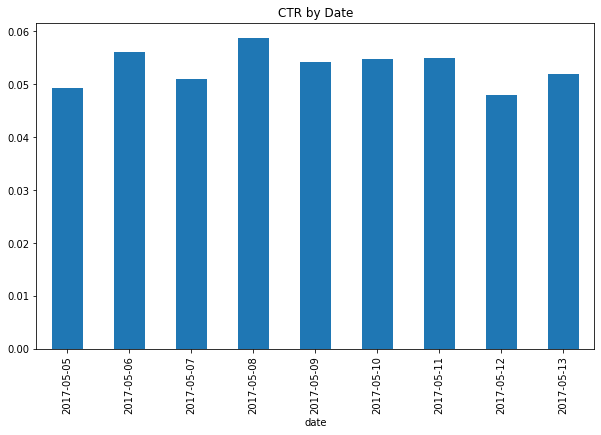

In [0]:
hs=data.groupby('date')['clk'].mean()
hs.plot(kind='bar', figsize=(10,6))
plt.title('CTR by Date')

In [0]:
import datetime as dt
data['hour']=pd.to_datetime(data['ad_time_stamp'],unit='s').dt.hour
data_0['hour']=pd.to_datetime(data_0['ad_time_stamp'],unit='s').dt.hour

Text(0.5, 1.0, 'CTR by hour')

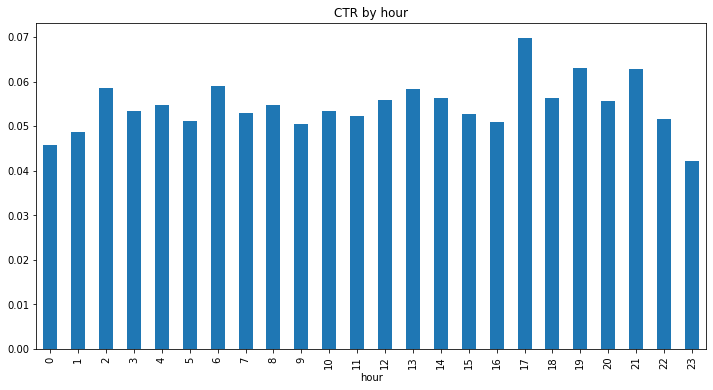

In [0]:
hs=data.groupby('hour')['clk'].mean()
hs.plot(kind='bar', figsize=(12,6))
plt.title('CTR by hour')

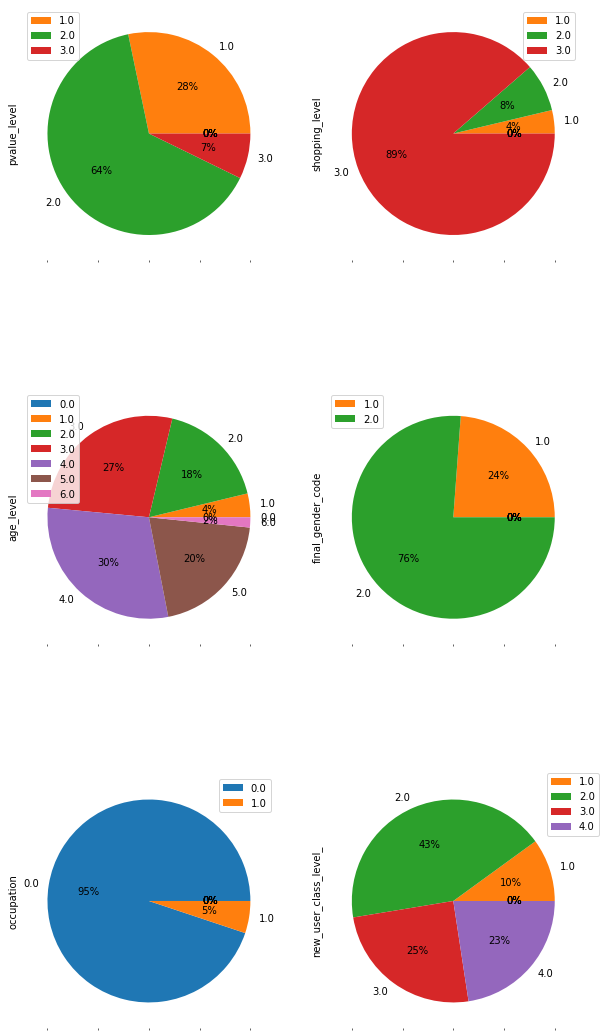

In [0]:
data[['pvalue_level','shopping_level','age_level','final_gender_code','occupation','new_user_class_level_']].apply(pd.value_counts).plot(kind='pie', subplots=True,autopct='%1.0f%%',radius=1,layout=(3,2),figsize=(10,20))
plt.legend(bbox_to_anchor=(0.85,1.025), loc="upper left")

Text(0.5, 1.0, 'CTR by Age Level')

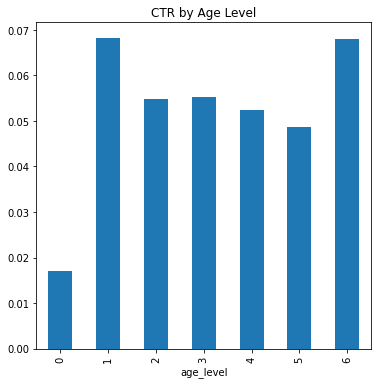

In [0]:
#age_level: age_level
hs=data.groupby('age_level')['clk'].mean()
hs.plot(kind='bar', figsize=(6,6))
plt.title('CTR by Age Level')

Text(0.5, 1.0, 'CTR by Age Level and Shopping Level')

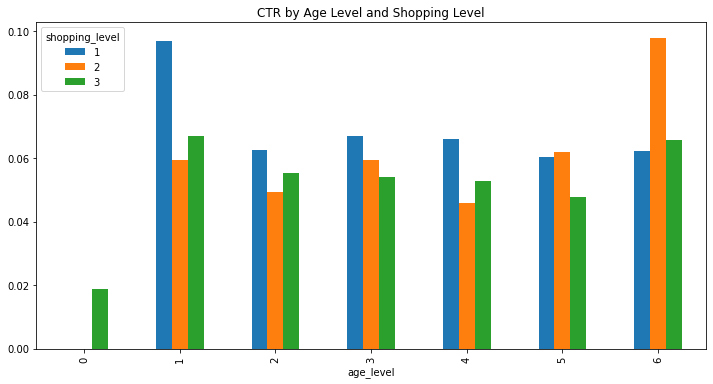

In [0]:
#age_level: age_level
hs=data.groupby(['age_level','shopping_level'])['clk'].mean()
hs.unstack().plot(kind='bar', figsize=(12,6))
plt.title('CTR by Age Level and Shopping Level')

In [0]:
pd.DataFrame(hs)

clk
age_level shopping_level          
0         1               0.000000
          2               0.000000
          3               0.018828
1         1               0.096807
          2               0.059248
          3               0.067063
2         1               0.062528
          2               0.049402
          3               0.055146
3         1               0.067012
          2               0.059492
          3               0.053900
4         1               0.066078
          2               0.045755
          3               0.052854
5         1               0.060301
          2               0.061926
          3               0.047630
6         1               0.062284
          2               0.097849
          3               0.065653

Text(0.5, 1.0, 'CTR by gender')

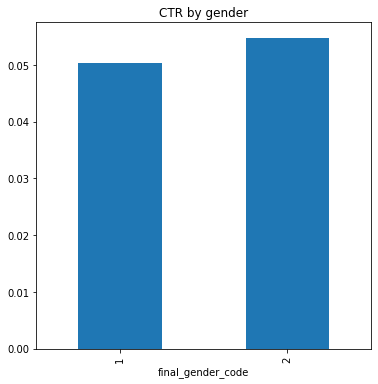

In [0]:
#final_gender_code: gender 1 for male , 2 for female
hs=data.groupby('final_gender_code')['clk'].mean()
hs.plot(kind='bar', figsize=(6,6))
plt.title('CTR by gender')

Text(0.5, 1.0, 'CTR by Consumption Grade')

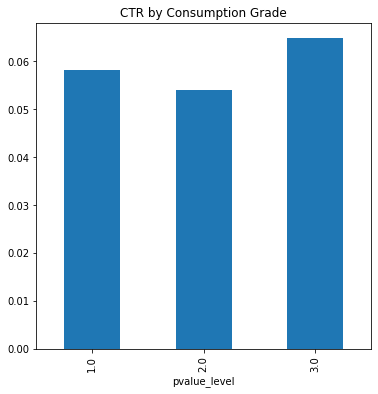

In [0]:
#pvalue_level: Consumption grade, 1: low,  2: mid,  3: high
hs=data.groupby('pvalue_level')['clk'].mean()
hs.plot(kind='bar', figsize=(6,6))
plt.title('CTR by Consumption Grade')

Text(0, 0.5, 'CTR')

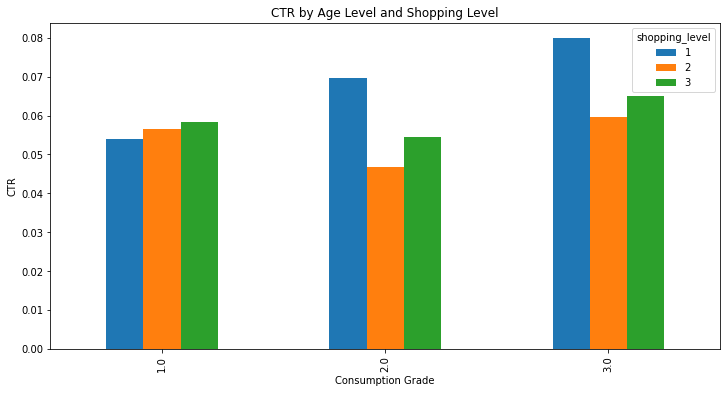

In [0]:
#pvalue_level: Consumption grade, 1: low,  2: mid,  3: high
hs=data.groupby(['pvalue_level','shopping_level'])['clk'].mean()
hs.unstack().plot(kind='bar', figsize=(12,6))
plt.title('CTR by Age Level and Shopping Level')
plt.xlabel('Consumption Grade')
plt.ylabel('CTR')

Text(0.5, 1.0, 'CTR by occupation ')

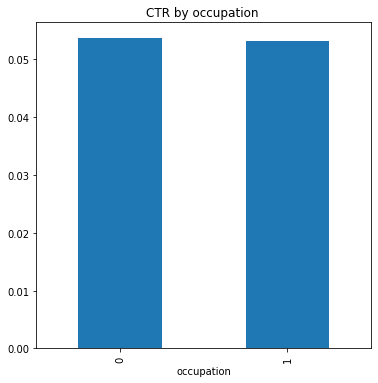

In [0]:
#occupation: Is the college student 1: yes, 0: no?
hs=data.groupby('occupation')['clk'].mean()
hs.plot(kind='bar', figsize=(6,6))
plt.title('CTR by occupation ')

Text(0.5, 1.0, 'CTR by occupation')

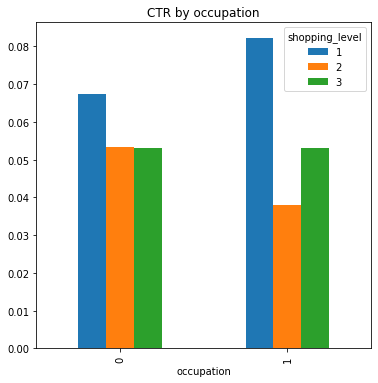

In [0]:
#occupation shopping level
hs=data.groupby(['occupation','shopping_level'])['clk'].mean()
hs.unstack().plot(kind='bar', figsize=(6,6))
plt.title('CTR by occupation')

In [0]:
hs.unstack()

shopping_level,1,2,3
occupation,,,
0,0.067526,0.053261,0.053142
1,0.082286,0.037926,0.053135


Text(0.5, 1.0, 'CTR by occupation & gender')

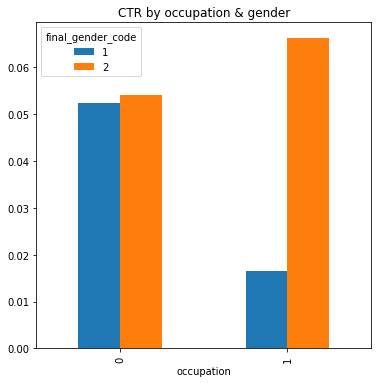

In [0]:
#occupation shopping level
hs=data.groupby(['occupation','final_gender_code'])['clk'].mean()
hs.unstack().plot(kind='bar', figsize=(6,6))
plt.title('CTR by occupation & gender')

In [0]:
hs.unstack()

final_gender_code,1,2
occupation,,
0,0.052320,0.054135
1,0.016458,0.066262


Text(0.5, 1.0, 'CTR by occupation')

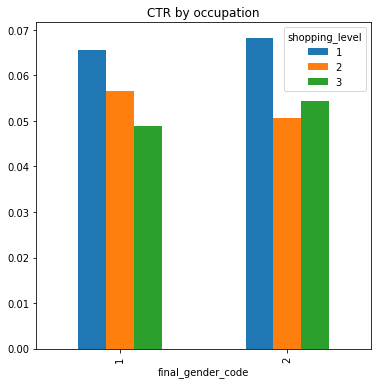

In [0]:
#new_user_class_level: City level
hs=data.groupby(['final_gender_code','shopping_level'])['clk'].mean()
hs.unstack().plot(kind='bar', figsize=(6,6))
plt.title('CTR by gender')

In [0]:
hs.unstack()

shopping_level,1,2,3
final_gender_code,,,
1,0.065638,0.056698,0.048813
2,0.068259,0.050631,0.054410


Text(0.5, 1.0, 'CTR by new_user_class_level')

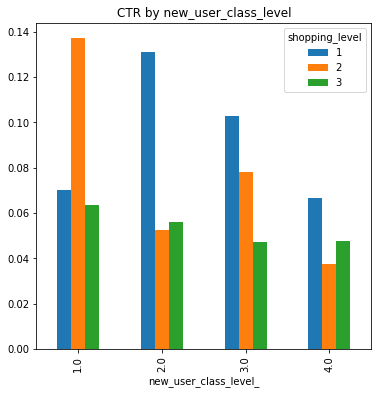

In [0]:
#new_user_class_level: City level
hs=data.groupby(['new_user_class_level_','shopping_level'])['clk'].mean()
hs.unstack().plot(kind='bar', figsize=(6,6))
plt.title('CTR by new_user_class_level')

In [0]:
pd.DataFrame(hs.unstack())

shopping_level,1,2,3
new_user_class_level_,,,
1.0,0.070261,0.137001,0.063607
2.0,0.131122,0.052513,0.056029
3.0,0.102914,0.078120,0.047155
4.0,0.066750,0.037434,0.047751


##Model

In [0]:
data_final.columns

Index(['user', 'cate', 'btag', 'num', 'adgroup_id', 'userid', 'cms_segid',
       'cms_group_id', 'final_gender_code', 'age_level', 'pvalue_level',
       'shopping_level', 'occupation', 'new_user_class_level_',
       'ad_time_stamp', 'pid', 'nonclk', 'clk', 'ad_cate_id', 'campaign_id',
       'customer', 'ad_brand', 'price', 'date', 'hour', 'buy', 'cart', 'fav',
       'pv'],
      dtype='object')

In [0]:
#split train test dataset at 0.75 / 0.25
col = ['buy', 'cart', 'fav','pv','final_gender_code', 'age_level', 'pvalue_level',
       'shopping_level', 'occupation', 'new_user_class_level_','price','hour']
X = data_final[col]
y = data_final['clk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [0]:
#oversampling
os = SMOTE(random_state=0)
X_train, y_train = os.fit_sample(X_train, y_train)
X_train = pd.DataFrame(X_train,columns=col)
y_train = pd.DataFrame(y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Logistic Regression

In [0]:
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.688773
         Iterations 4
                            Results: Logit
Model:                Logit             Pseudo R-squared:  0.006       
Dependent Variable:   0.0000            AIC:               4938507.8206
Date:                 2020-06-05 09:48  BIC:               4938664.9278
No. Observations:     3584986           Log-Likelihood:    -2.4692e+06 
Df Model:             11                LL-Null:           -2.4849e+06 
Df Residuals:         3584974           LLR p-value:       0.0000      
Converged:            1.0000            Scale:             1.0000      
No. Iterations:       4.0000                                           
-----------------------------------------------------------------------
                       Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
buy                   -0.0123   0.0004  -31.7677 0.0000 -0.0131

In [0]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
fp_rate, tp_rate, thresholds = roc_curve(y_true, y_pred)
print(auc(fp_rate, tp_rate))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.95      0.62      0.75    597645
           1       0.06      0.46      0.11     33647

    accuracy                           0.61    631292
   macro avg       0.51      0.54      0.43    631292
weighted avg       0.91      0.61      0.71    631292

0.5392780885908228


### Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=32, max_depth=40, min_samples_split=100, min_samples_leaf=10, random_state=0, criterion='entropy',max_features=8, verbose = 1, n_jobs=-1, bootstrap=False)
clf.fit(X_train, y_train)
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
fp_rate, tp_rate, thresholds = roc_curve(y_true, y_pred)
print(auc(fp_rate, tp_rate))

feature=['btag', 'num', 'final_gender_code', 'age_level', 'pvalue_level','shopping_level', 'occupation', 'new_user_class_level_','price', 'date', 'hour']
#rf1_imp = pd.DataFrame({'feature':feature, 'impt': clf.feature_importances_})
print(clf.feature_importances_)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed: 14.8min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  32 out of  32 | elapsed:    4.3s finished


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    597645
           1       0.93      0.96      0.94     33647

    accuracy                           0.99    631292
   macro avg       0.96      0.98      0.97    631292
weighted avg       0.99      0.99      0.99    631292

0.9764075878625261
[0.06977339 0.09692358 0.07685626 0.21192319 0.01918339 0.04997119
 0.03549196 0.01518151 0.00761114 0.04796577 0.21736929 0.15174934]


### XGBoost

In [0]:
from xgboost import XGBClassifier
clf = XGBClassifier(n_estimators=1000)
clf.fit(X_train, y_train)
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
fp_rate, tp_rate, thresholds = roc_curve(y_true, y_pred)
print(auc(fp_rate, tp_rate))

feature=['btag', 'num', 'final_gender_code', 'age_level', 'pvalue_level','shopping_level', 'occupation', 'new_user_class_level_','price', 'date', 'hour']
#rf1_imp = pd.DataFrame({'feature':feature, 'impt': clf.feature_importances_})
print(clf.feature_importances_)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.97      0.68      0.80    597645
           1       0.09      0.58      0.16     33647

    accuracy                           0.68    631292
   macro avg       0.53      0.63      0.48    631292
weighted avg       0.92      0.68      0.77    631292

0.6340237021088525
[0.05181557 0.04617488 0.05458047 0.05352324 0.13563816 0.0902473
 0.13704966 0.10345595 0.10393994 0.14008057 0.04219087 0.04130344]
